In [6]:
# 基本概率论
# 大数定律（law of large numbers）告诉我们： 随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率。 让我们用代码试一试！
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
# 在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 
# 笼统来说，可以把分布（distribution）看作对事件的概率分配， 稍后我们将给出的更正式定义。
#  将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。

# 为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引
# 处的值是采样结果中
# 出现的次数。

fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [3]:
# 在估计一个骰子的公平性时，我们希望从同一分布中生成多个样本。 如果用Python的for循环来完成这个任务，速度会慢得惊人。 
# 因此我们使用深度学习框架的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组。

multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 3., 1., 2., 1.])

In [4]:
# 现在我们知道如何对骰子进行采样，我们可以模拟1000次投掷。 
# 然后，我们可以统计1000次投掷后，每个数字被投中了多少次。
#  具体来说，我们计算相对频率，以作为真实概率的估计。

# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1770, 0.1840, 0.1510, 0.1570, 0.1760, 0.1550])

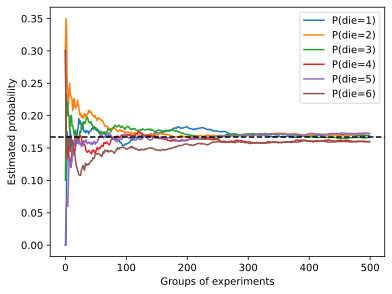

In [10]:
# 因为我们是从一个公平的骰子中生成的数据，我们知道每个结果都有真实的概率,大约是1/6 = 0.167所以上面输出的估计值看起来不错。
# 我们也可以看到这些概率如何随着时间的推移收敛到真实概率。 让我们进行500组实验，每组抽取10个样本。
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [11]:
# 每条实线对应于骰子的6个值中的一个，并给出骰子在每组实验后出现值的估计概率。 当我们通过更多的实验获得更多的数据时，这
# 条实体曲线向真实概率收敛。